<a href="https://colab.research.google.com/github/alexamgreat/Predicting-Disease-Spread/blob/main/Conser_vision_Practice_Area_Image_Classification_Base_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub
print("TF version, tf-hub version")
print(tf.__version__)
print(tensorflow_hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version, tf-hub version
2.18.0
0.16.1
GPU is available


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#unzip images
!unzip "/content/drive/MyDrive/Conser-vision Practice Area: Image Classification/train_features.zip" -d "/content/train_features"



Streaming output truncated to the last 5000 lines.
  inflating: /content/train_features/train_features/ZJ009992.jpg  
  inflating: /content/train_features/train_features/ZJ000008.jpg  
  inflating: /content/train_features/train_features/ZJ003501.jpg  
 extracting: /content/train_features/train_features/ZJ013712.jpg  
  inflating: /content/train_features/train_features/ZJ005170.jpg  
  inflating: /content/train_features/train_features/ZJ015363.jpg  
  inflating: /content/train_features/train_features/ZJ014069.jpg  
  inflating: /content/train_features/train_features/ZJ003515.jpg  
  inflating: /content/train_features/train_features/ZJ013706.jpg  
  inflating: /content/train_features/train_features/ZJ005164.jpg  
  inflating: /content/train_features/train_features/ZJ012418.jpg  
  inflating: /content/train_features/train_features/ZJ015377.jpg  
  inflating: /content/train_features/train_features/ZJ001302.jpg  
  inflating: /content/train_features/train_features/ZJ011111.jpg  
  inflating

In [ ]:

# Read the CSV file from Google Drive into a Pandas DataFrame
train_features= pd.read_csv("drive/MyDrive/Conser-vision Practice Area: Image Classification/train_features.csv")
train_features.head()# Display the first 5 rows of the DataFrame to inspect its structure

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [ ]:
# Read the CSV file from Google Drive into a Pandas DataFrame
train_labels= pd.read_csv("drive/MyDrive/Conser-vision Practice Area: Image Classification/train_labels.csv")
train_labels.head()

,id,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import os
#Verify Image Files
image_dir = "/content/train_features/train_features"
# Count images
image_count = len([f for f in os.listdir(image_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
print(f"🔍 Total images found: {image_count}")


🔍 Total images found: 16488


In [ ]:
#viewing class distribution
# Drop the 'id' column (it is not a class label)
class_counts = train_labels.drop(columns=["id"]).sum()

# Print unique classes and their counts
print("\n📌 Unique Classes:", list(class_counts.index))
print("\n📌 Class Distribution:")
print(class_counts)




📌 Unique Classes: ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']

📌 Class Distribution:
antelope_duiker     2474.0
bird                1641.0
blank               2213.0
civet_genet         2423.0
hog                  978.0
leopard             2254.0
monkey_prosimian    2492.0
rodent              2013.0
dtype: float64


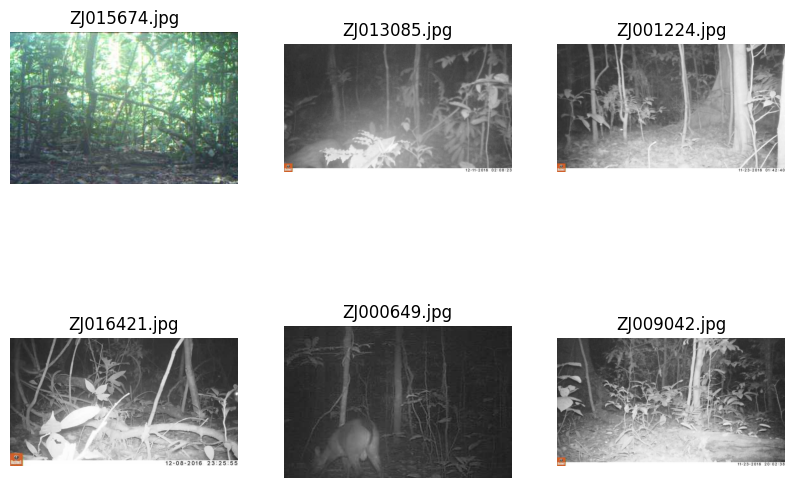

In [ ]:
#view sample of images randomly
import matplotlib.pyplot as plt
import cv2
import random

# Get all image file paths
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))]

# Show 6 random images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for ax in axes.ravel():
    img_name = random.choice(image_files)  # Pick a random image
    img_path = os.path.join(image_dir, img_name)

    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")

plt.show()


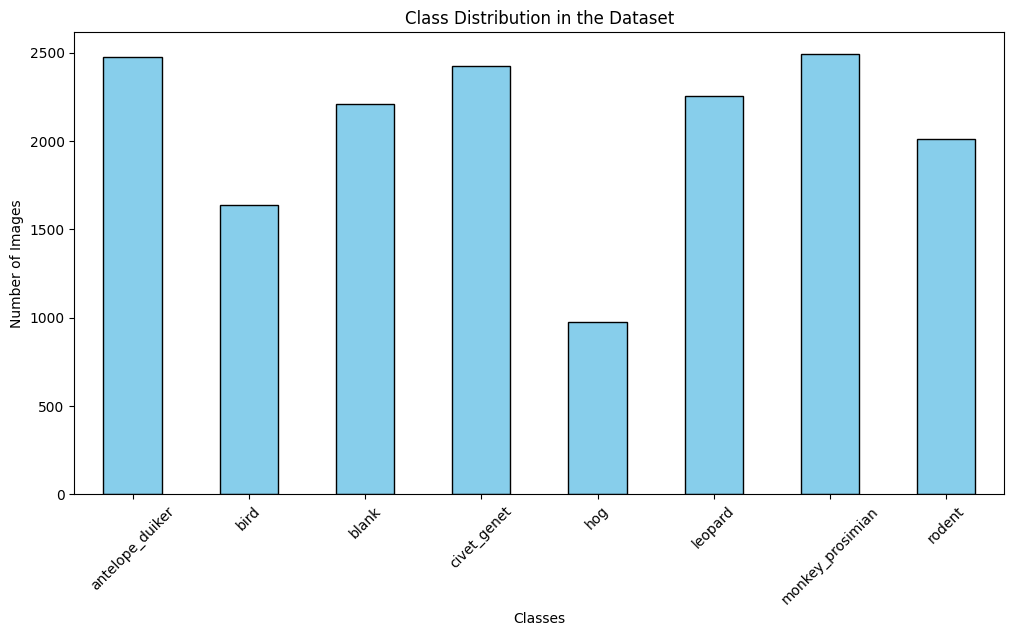

In [ ]:

# Plot class distribution
plt.figure(figsize=(12, 6))
class_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45)
plt.show()



In [ ]:
#This code is used to convert one-hot encoded labels into a single categorical column and then merge it with the training features.
class_names = train_labels.columns[1:]  # Exclude 'id'
train_labels['label'] = train_labels[class_names].idxmax(axis=1)#.idxmax(axis=1) finds the column name (class label) with the highest value (1 in one-hot encoding) for each row.

# Merge train_features with train_labels using 'id'
train_df = pd.merge(train_features, train_labels[['id', 'label']], on="id")

# Display first few rows to verify
print(train_df.head())


         id                     filepath   site             label
0  ZJ000000  train_features/ZJ000000.jpg  S0120              bird
1  ZJ000001  train_features/ZJ000001.jpg  S0069  monkey_prosimian
2  ZJ000002  train_features/ZJ000002.jpg  S0009              bird
3  ZJ000003  train_features/ZJ000003.jpg  S0008  monkey_prosimian
4  ZJ000004  train_features/ZJ000004.jpg  S0036           leopard


In [ ]:
#a summary of the train_df DataFrame.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16488 entries, 0 to 16487
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        16488 non-null  object
 1   filepath  16488 non-null  object
 2   site      16488 non-null  object
 3   label     16488 non-null  object
dtypes: object(4)
memory usage: 515.4+ KB


In [ ]:
base_dir = "/content/train_features/train_features/"  # Your image directory
train_df["filepath"] = train_df["id"].apply(lambda x: os.path.join(base_dir, x + ".jpg"))  # Assuming .jpg extension

# Check the first few file paths to ensure they're correct
print(train_df["filepath"].head())



0    /content/train_features/train_features/ZJ00000...
1    /content/train_features/train_features/ZJ00000...
2    /content/train_features/train_features/ZJ00000...
3    /content/train_features/train_features/ZJ00000...
4    /content/train_features/train_features/ZJ00000...
Name: filepath, dtype: object


In [ ]:
missing_files = train_df[~train_df["filepath"].apply(os.path.exists)]
print(f"Missing files: {len(missing_files)}")


Missing files: 0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with rescaling (optional, based on your needs)
datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Create the training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",   # Column with file paths
    y_col="label",      # Column with labels
    target_size=(224, 224),  # Resize images
    batch_size=32,      # Number of images to return in each batch
    class_mode="categorical",  # Since you have more than 2 classes
    subset="training",  # For the training set
    shuffle=True        # Shuffle images for better training
)

# Create the validation data generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",   # Column with file paths
    y_col="label",      # Column with labels
    target_size=(224, 224),  # Resize images
    batch_size=32,      # Number of images to return in each batch
    class_mode="categorical",  # Since you have more than 2 classes
    subset="validation",  # For the validation set
    shuffle=False       # Don't shuffle validation data
)


Found 13191 validated image filenames belonging to 8 classes.
Found 3297 validated image filenames belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # 8 output classes
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,424 (91.20 MB)

 Trainable params: 23,908,424 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 213s 516ms/step - accuracy: 0.3061 - loss: 1.7616 - val_accuracy: 0.3439 - val_loss: 1.6938
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 214s 518ms/step - accuracy: 0.3225 - loss: 1.7172 - val_accuracy: 0.3318 - val_loss: 1.6650
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 213s 516ms/step - accuracy: 0.3424 - loss: 1.6743 - val_accuracy: 0.3485 - val_loss: 1.6598
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 213s 515ms/step - accuracy: 0.3502 - loss: 1.6560 - val_accuracy: 0.3694 - val_loss: 1.6114
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 207s 502ms/step - accuracy: 0.3511 - loss: 1.6421 - val_accuracy: 0.3816 - val_loss: 1.5848
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 263s 505ms/step - accuracy: 0.3636 - loss: 1.6224 - val_accuracy: 0.3776 - val_loss: 1.6034
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 264s 509ms/step - accuracy: 0.3597 - loss: 1.6211 - val_accuracy: 0.3728 - val_loss: 1.6121
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 210s 509ms/step - accuracy: 0.3602 -

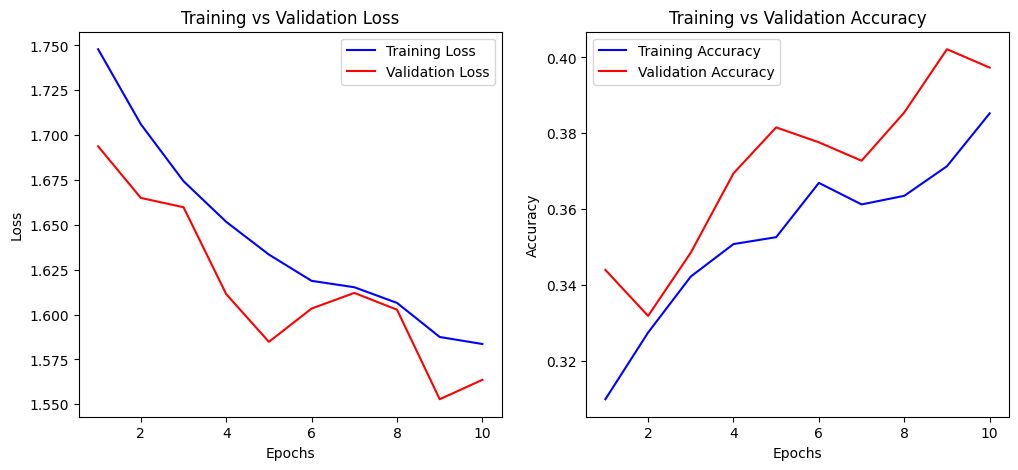

In [ ]:

# Extract values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Save the model to a file
model.save("/content/drive/MyDrive/Conser-vision Practice Area: Image Classification.keras")


Prepare test_df and making predictions

In [ ]:
!unzip "/content/drive/MyDrive/Conser-vision Practice Area: Image Classification/test_features.zip" -d "/content/test_features"

Archive:  /content/drive/MyDrive/Conser-vision Practice Area: Image Classification/test_features.zip
   creating: /content/test_features/test_features/
  inflating: /content/test_features/test_features/ZJ018402.jpg  
  inflating: /content/test_features/test_features/ZJ017731.jpg  
  inflating: /content/test_features/test_features/ZJ020823.jpg  
 extracting: /content/test_features/test_features/ZJ018364.jpg  
  inflating: /content/test_features/test_features/ZJ017057.jpg  
  inflating: /content/test_features/test_features/ZJ020837.jpg  
  inflating: /content/test_features/test_features/ZJ018370.jpg  
  inflating: /content/test_features/test_features/ZJ017043.jpg  
  inflating: /content/test_features/test_features/ZJ018416.jpg  
  inflating: /content/test_features/test_features/ZJ017725.jpg  
 extracting: /content/test_features/test_features/ZJ020189.jpg  
  inflating: /content/test_features/test_features/ZJ019708.jpg  
  inflating: /content/test_features/test_features/ZJ019720.jpg  
  i

In [ ]:

# Load the CSV that contains the test image metadata (paths)
test_df = pd.read_csv('/content/drive/MyDrive/Conser-vision Practice Area: Image Classification/test_features.csv')

# Display the first few rows to understand its structure
print(test_df.head())


         id                    filepath   site
0  ZJ016488  test_features/ZJ016488.jpg  S0082
1  ZJ016489  test_features/ZJ016489.jpg  S0040
2  ZJ016490  test_features/ZJ016490.jpg  S0040
3  ZJ016491  test_features/ZJ016491.jpg  S0041
4  ZJ016492  test_features/ZJ016492.jpg  S0040


In [ ]:

# Define the base directory for the test images
base_test_dir = "/content/test_features/test_features/"  # Your test image directory

# Update the 'filepath' column with the correct file paths
test_df["filepath"] = test_df["id"].apply(lambda x: os.path.join(base_test_dir, x + ".jpg"))  # Assuming .jpg extension

# Check the first few file paths to ensure they're correct
print(test_df["filepath"].head())


0    /content/test_features/test_features/ZJ016488.jpg
1    /content/test_features/test_features/ZJ016489.jpg
2    /content/test_features/test_features/ZJ016490.jpg
3    /content/test_features/test_features/ZJ016491.jpg
4    /content/test_features/test_features/ZJ016492.jpg
Name: filepath, dtype: object


In [ ]:

# Initialize the ImageDataGenerator for rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Create the test data generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',  # Column with image paths
    y_col=None,        # No labels for test set
    target_size=(224, 224),  # Resize to model's expected input size
    batch_size=32,
    class_mode=None,   # No labels
    shuffle=False      # Keep predictions in order
)

# Predict probabilities for each class
predictions = model.predict(test_generator, verbose=1)

# Define class names in the required order (ensure these match your model's class labels)
class_names = [
    "antelope_duiker", "bird", "blank", "civet_genet",
    "hog", "leopard", "monkey_prosimian", "rodent"
]

# Construct DataFrame with IDs and prediction probabilities
results = pd.DataFrame(predictions, columns=class_names)
results.insert(0, 'id', test_df['id'])  # Insert 'id' as the first column

# Save predictions to a CSV file
results.to_csv('/content/predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Found 4464 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step
Predictions saved to predictions.csv
